# Load model

We will use quantized model (AWQ) to fit model in free Colab tier. vLLM will speed up inference.

In [ ]:
from vllm import LLM, SamplingParams
import torch
import numpy as np

llm = LLM(model="microsoft/phi-2",
          # quantization='awq',
          # dtype='half',
          max_model_len=128)


In [13]:
sampling_params = SamplingParams(temperature=0,
                                 max_tokens=8)

prompts = [
    "2 + 2 =",
    "2+2 =",
    "Return only result: 2+2=",
    "Return only result: 2 + 2 =",
    "3 + 24 =",
    "3+24 =",
    "Return only result: 3 + 24 =",
    "23 + 2 =",
    "23+2 =",
    "Return only result: 23 + 2 =",
    "33 + 3 =",
    "3+33=",
    "Return only result: 3 + 33 =",
    "2 * 2 =",
    "2*2 =",
    "Return only result: 2 * 2 =",
    "Return only result: 234 * 231 =",
    "Return only result witn no explanation: 234 * 231 = ",
]

outputs = llm.generate(prompts, sampling_params)

# Print the outputs.
for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f"\nPrompt: {prompt!r}, \nGenerated text: {generated_text!r}")

Processed prompts: 100%|██████████| 18/18 [00:00<00:00, 52.91it/s]


Prompt: '2 + 2 =', 
Generated text: ' 0.\n<|question_end'

Prompt: '2+2 =', 
Generated text: ' 4\nStep 3: The final answer'

Prompt: 'Return only result: 2+2=', 
Generated text: '4\n    """\n    return sum'

Prompt: 'Return only result: 2 + 2 =', 
Generated text: ' 4\n\nA:\n\nYou'

Prompt: '3 + 24 =', 
Generated text: ' 3x + 24\n\nStep 2'

Prompt: '3+24 =', 
Generated text: ' 3+24\nStep 3: Add'

Prompt: 'Return only result: 3 + 24 =', 
Generated text: ' 27\n```\n\n## Ex'

Prompt: '23 + 2 =', 
Generated text: ' 25\n\nStep 3: The final'

Prompt: '23+2 =', 
Generated text: ' 25\nStep 3: The final answer'

Prompt: 'Return only result: 23 + 2 =', 
Generated text: ' 25\n\nA:\n\nYou'

Prompt: '33 + 3 =', 
Generated text: ' 33 + 3\nStep 3: Add'

Prompt: '3+33=', 
Generated text: '36.\n\nTherefore, the total'

Prompt: 'Return only result: 3 + 33 =', 
Generated text: ' 36\n\nA:\n\nYou'

Prompt: '2 * 2 =', 
Generated text: ' 4\n\nStep 3: Add the'

Prompt: '2*2 =', 
Generated text: ' 4\n\nStep 3:

#Prepare data

In [28]:
def clean_output(txt):
  try:
    x = txt.strip().split()[0].replace(',', '')
    x = float(x)
    return x
  except:
    return 0

In [41]:
PROMPT = "Instruct:\n{inst}\nOutput: "

def calculate(dataset, operation):
  p = [PROMPT.format(inst=f'{a} {operation} {b}') for a, b, _ in dataset]
  outputs = llm.generate(p, sampling_params)
  return [x.outputs[0].text for x in outputs]

### Generate dataset

In [33]:
def add(a, b):
    return a + b


def subtract(a, b):
    return a - b


def multiply(a, b):
    return a * b


def divide(a, b):
    if b != 0:
        return round(a / b, 2)
    else:
        return None  # Handle division by zero


def generate_dataset(start, end, function):
     return [(i, j, function(i, j)) for i in range(start, end + 1) for j in range(start, end + 1)]

### Plot results

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_heatmap(dataset, weights, operator='+'):
  a_values, b_values, _ = zip(*dataset)

  # Creating bins for a and b with bin size 10
  a_bins = np.arange(1, 110, 10)
  b_bins = np.arange(1, 110, 10)

  # Creating a 2D histogram based on the sum of 'True' values
  heatmap, xedges, yedges = np.histogram2d(a_values,
                                           b_values,
                                           bins=[a_bins, b_bins],
                                           weights=weights)

  # Plotting the heatmap
  plt.imshow(heatmap,
             extent=[xedges[0],
                     xedges[-1],
                     yedges[0],
                     yedges[-1]],
             origin='lower',
             cmap='viridis',
             aspect='auto')
  plt.colorbar(label='Number of correct values')
  plt.xlabel('a')
  plt.ylabel('b')
  plt.title(f'Number of Correct Answers for a {operator} b')

  plt.show()

## Test adding

In [44]:
add_dataset = generate_dataset(1, 100, add)
results_raw = calculate(add_dataset, '+')
results = [clean_output(x) for x in results_raw]

Processed prompts: 100%|██████████| 10000/10000 [00:56<00:00, 175.91it/s]

['Instruct:\n1 + 1\nOutput: ', 'Instruct:\n1 + 2\nOutput: ', 'Instruct:\n1 + 3\nOutput: ', 'Instruct:\n1 + 4\nOutput: ', 'Instruct:\n1 + 5\nOutput: ', 'Instruct:\n1 + 6\nOutput: ', 'Instruct:\n1 + 7\nOutput: ', 'Instruct:\n1 + 8\nOutput: ', 'Instruct:\n1 + 9\nOutput: ', 'Instruct:\n1 + 10\nOutput: ', 'Instruct:\n1 + 11\nOutput: ', 'Instruct:\n1 + 12\nOutput: ', 'Instruct:\n1 + 13\nOutput: ', 'Instruct:\n1 + 14\nOutput: ', 'Instruct:\n1 + 15\nOutput: ', 'Instruct:\n1 + 16\nOutput: ', 'Instruct:\n1 + 17\nOutput: ', 'Instruct:\n1 + 18\nOutput: ', 'Instruct:\n1 + 19\nOutput: ', 'Instruct:\n1 + 20\nOutput: ', 'Instruct:\n1 + 21\nOutput: ', 'Instruct:\n1 + 22\nOutput: ', 'Instruct:\n1 + 23\nOutput: ', 'Instruct:\n1 + 24\nOutput: ', 'Instruct:\n1 + 25\nOutput: ', 'Instruct:\n1 + 26\nOutput: ', 'Instruct:\n1 + 27\nOutput: ', 'Instruct:\n1 + 28\nOutput: ', 'Instruct:\n1 + 29\nOutput: ', 'Instruct:\n1 + 30\nOutput: ', 'Instruct:\n1 + 31\nOutput: ', 'Instruct:\n1 + 32\nOutput: ', 'Instruct:\n1 + 

In [43]:
results_raw[:10]

['\n2\n',
 '\n3\n',
 '\n4\n',
 '\n5\n',
 '\n6\n',
 '\n7\n',
 '\n8\n',
 '\n9\n',
 '\n10\n',
 '\n11\n']

In [45]:
y_true = [x[2] for x in add_dataset]
y_true = np.array(y_true)
results = np.array(results)
acc = sum(results == y_true) / len(results)

In [46]:
acc

0.4965

In [50]:
print(sum(results==0)/results.shape[0])

0.1545


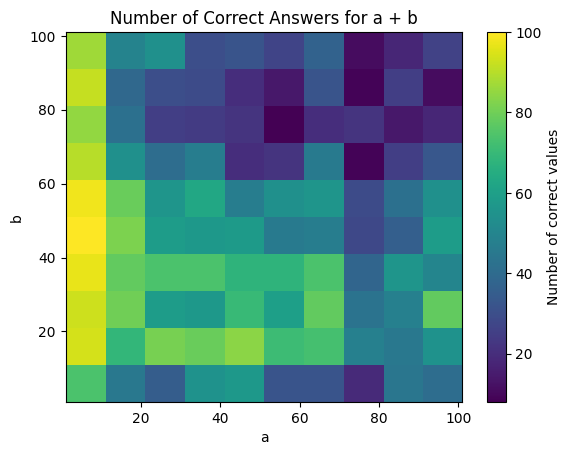

In [51]:
plot_heatmap(add_dataset, results==y_true)

## Test multiplication

In [52]:
mul_dataset = generate_dataset(1, 100, multiply)
results_raw = calculate(mul_dataset, '*')
results = [clean_output(x) for x in results_raw]

Processed prompts: 100%|██████████| 10000/10000 [00:55<00:00, 181.77it/s]

['Instruct:\n1 * 1\nOutput: ', 'Instruct:\n1 * 2\nOutput: ', 'Instruct:\n1 * 3\nOutput: ', 'Instruct:\n1 * 4\nOutput: ', 'Instruct:\n1 * 5\nOutput: ', 'Instruct:\n1 * 6\nOutput: ', 'Instruct:\n1 * 7\nOutput: ', 'Instruct:\n1 * 8\nOutput: ', 'Instruct:\n1 * 9\nOutput: ', 'Instruct:\n1 * 10\nOutput: ', 'Instruct:\n1 * 11\nOutput: ', 'Instruct:\n1 * 12\nOutput: ', 'Instruct:\n1 * 13\nOutput: ', 'Instruct:\n1 * 14\nOutput: ', 'Instruct:\n1 * 15\nOutput: ', 'Instruct:\n1 * 16\nOutput: ', 'Instruct:\n1 * 17\nOutput: ', 'Instruct:\n1 * 18\nOutput: ', 'Instruct:\n1 * 19\nOutput: ', 'Instruct:\n1 * 20\nOutput: ', 'Instruct:\n1 * 21\nOutput: ', 'Instruct:\n1 * 22\nOutput: ', 'Instruct:\n1 * 23\nOutput: ', 'Instruct:\n1 * 24\nOutput: ', 'Instruct:\n1 * 25\nOutput: ', 'Instruct:\n1 * 26\nOutput: ', 'Instruct:\n1 * 27\nOutput: ', 'Instruct:\n1 * 28\nOutput: ', 'Instruct:\n1 * 29\nOutput: ', 'Instruct:\n1 * 30\nOutput: ', 'Instruct:\n1 * 31\nOutput: ', 'Instruct:\n1 * 32\nOutput: ', 'Instruct:\n1 * 

In [53]:
y_true = [x[2] for x in mul_dataset]
y_true = np.array(y_true)
results = np.array(results)
acc = sum(results == y_true) / len(results)

In [54]:
acc

0.5007

In [56]:
print(sum(results==0)/results.shape[0])

0.0404


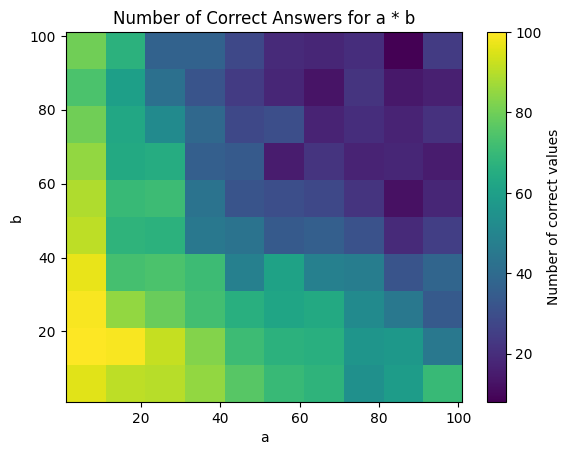

In [55]:
plot_heatmap(mul_dataset, results==y_true, operator='*')

# Test fine-tuned model

### Finetune dataset

Multiplication for  a, b in range 60-100.

In [ ]:
from vllm import LLM, SamplingParams
import torch
import numpy as np

llm = LLM(model="adriata/calc_mistral_awq",
          quantization='awq',
          dtype='half',
          max_model_len=128)


In [ ]:
sampling_params = SamplingParams(temperature=0,
                                 max_tokens=8)

In [ ]:
mul_dataset = generate_dataset(1, 100, multiply)
results_raw = calculate(mul_dataset, '*')
results = [clean_output(x) for x in results_raw]

Processed prompts: 100%|██████████| 10000/10000 [06:16<00:00, 26.56it/s]


In [ ]:
y_true = [x[2] for x in mul_dataset]
y_true = np.array(y_true)
results = np.array(results)
acc = sum(results == y_true) / len(results)
acc

0.6436

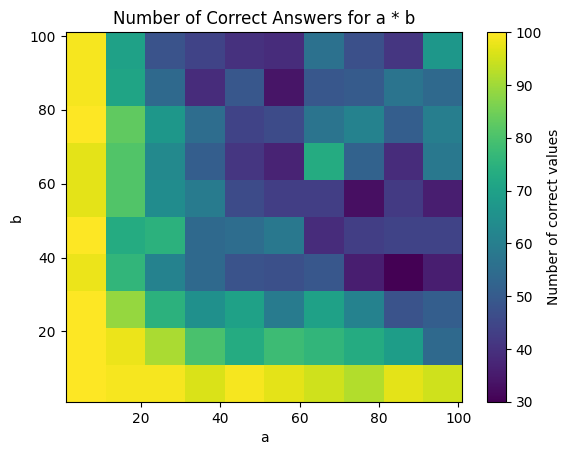

In [ ]:
plot_heatmap(mul_dataset, results==y_true, operator='*')